# Import The Libraries

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import img_to_array
from keras.utils import load_img
import matplotlib.pyplot as plt
from glob import glob
import os
from skimage import io
import os
from PIL import Image


In [2]:
folders=glob(r'C:\Users\admin\Desktop\7 Semester\IBM_Project\Final Deliverables\Code_Project_Structure\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set\*')

In [3]:
classes=[]
a=0
for i in folders:
    a=a+1
    print(a,end="")
    classes.append(i[144:])
    print(" . "+i[144:]+"\n")

1 . Pepper,_bell___Bacterial_spot

2 . Pepper,_bell___healthy

3 . Potato___Early_blight

4 . Potato___healthy

5 . Potato___Late_blight

6 . Tomato___Bacterial_spot

7 . Tomato___Late_blight

8 . Tomato___Leaf_Mold

9 . Tomato___Septoria_leaf_spot



In [4]:
width=128
height=128
depth=3
inputShape = (depth, height, width)

# Initializing The Model

In [5]:
model = Sequential()

# ADD CNN Layers

In [6]:
model.add(Conv2D(32, (3, 3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3),input_shape=(128,128,3),activation='relu'))
model.add(Conv2D(64, (3, 3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3),input_shape=(128,128,3),activation='relu'))
model.add(Conv2D(128, (3, 3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

In [7]:
model.add(Dense (units = 300,activation = 'relu'))
model.add(Dense (units = 150,activation = 'relu'))
model.add(Dense(units = 75,activation = 'relu'))
model.add(Dense(units= 9, activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                    

In [9]:
train_datagen = ImageDataGenerator (rescale = 1./255, shear_range= 0.2,zoom_range= 0.2, horizontal_flip = True) 
test_datagen =ImageDataGenerator (rescale = 1)

# Preprocess The Images

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range= 0.2,zoom_range= 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1)

x_train = train_datagen.flow_from_directory(r'C:\Users\admin\Desktop\7 Semester\IBM_Project\Final Deliverables\Code_Project_Structure\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set',target_size=(128,128),batch_size=16, class_mode='categorical')

x_test = test_datagen.flow_from_directory(r'C:\Users\admin\Desktop\7 Semester\IBM_Project\Final Deliverables\Code_Project_Structure\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set',target_size=(128,128),batch_size=16, class_mode='categorical')

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


# Compile the model

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Fit the Model

In [14]:
history=model.fit(x_train,steps_per_epoch = 168,epochs = 20,validation_data=x_test)

Epoch 1/20
168/168 [==============================] - 546s 3s/step - loss: 2.0949 - accuracy: 0.2039 - val_loss: 181.8375 - val_accuracy: 0.1754
Epoch 2/20
168/168 [==============================] - 378s 2s/step - loss: 1.7056 - accuracy: 0.3833 - val_loss: 379.3466 - val_accuracy: 0.3036
Epoch 3/20
168/168 [==============================] - 681s 4s/step - loss: 1.3623 - accuracy: 0.5182 - val_loss: 314.6557 - val_accuracy: 0.3548
Epoch 4/20
168/168 [==============================] - 204s 1s/step - loss: 1.1879 - accuracy: 0.5858 - val_loss: 464.1825 - val_accuracy: 0.3349
Epoch 5/20
168/168 [==============================] - 215s 1s/step - loss: 1.0438 - accuracy: 0.6157 - val_loss: 625.8894 - val_accuracy: 0.2717
Epoch 6/20
168/168 [==============================] - 207s 1s/step - loss: 0.9412 - accuracy: 0.6656 - val_loss: 476.8145 - val_accuracy: 0.3481
Epoch 7/20
168/168 [==============================] - 207s 1s/step - loss: 0.8251 - accuracy: 0.7047 - val_loss: 761.7287 - val_ac

In [15]:
ref=dict(zip(list(x_train.class_indices.values()),list(x_train.class_indices.keys())))
print(ref)

{0: 'Pepper,_bell___Bacterial_spot', 1: 'Pepper,_bell___healthy', 2: 'Potato___Early_blight', 3: 'Potato___Late_blight', 4: 'Potato___healthy', 5: 'Tomato___Bacterial_spot', 6: 'Tomato___Late_blight', 7: 'Tomato___Leaf_Mold', 8: 'Tomato___Septoria_leaf_spot'}


# Save the Model

In [16]:
model.save("vegetable.h5")

# Load the Model

In [17]:
from tensorflow import keras
loaded=keras.models.load_model("vegetable.h5")
print("Loaded")

Loaded


In [18]:
def predictionn(path):
    prob=[]
    import pandas as pd
    a=load_img(path,target_size=(128,128,3))
    a=img_to_array(a)
    plt.imshow(a/255)
    plt.show()
    img = np.array(a)
    i=np.expand_dims(img,axis=0)
    p=loaded.predict(i)

    pred=np.argmax(p)
    
    m=0
    #change s for vegetable
    s=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___healthy','Potato___Late_blight',
       'Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

    for i in p:
        for j in i:
            prob.append(str(int(j*100))+"%")
    ds=pd.DataFrame(prob,s)
    ds.columns=["Values"]
    print(ds)
    
    prob.sort(reverse=True)
    if pred not in (3,5):
        print(f"\nLeaves are affected by the disease :: {ref[pred]} : {prob[0]}")
    else:
        print(f"\n{ref[pred]} : {prob[0]}")
    
    
    #FERTILIZER RECOMMENDATION
    
#     if((solution[ref[pred]])!=""):
#         print("\nSolution:\n")
#         print(solution[ref[pred]])
#     else:
#         print("As far as plants are healthy!!!")

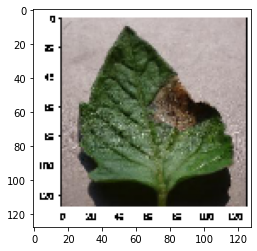

1/1 [==============================] - 0s 47ms/step
                              Values
Pepper,_bell___Bacterial_spot   100%
Pepper,_bell___healthy            0%
Potato___Early_blight             0%
Potato___healthy                  0%
Potato___Late_blight              0%
Tomato___Bacterial_spot           0%
Tomato___Late_blight              0%
Tomato___Leaf_Mold                0%
Tomato___Septoria_leaf_spot       0%

Leaves are affected by the disease :: Pepper,_bell___Bacterial_spot : 100%


In [20]:
path=r"C:\Users\admin\Desktop\7 Semester\IBM_Project\Final Deliverables\Code_Project_Structure\Veg_Test.png"
predictionn(path)